<a href="https://colab.research.google.com/github/minamjo/ASL-Project/blob/main/asl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASL Image Classification** 

import and installing tensorflow for our neural networks

In [179]:
!pip install --upgrade tensorflow
import tensorflow as tf
from tensorflow import keras
print('TensorFlow version:',tf.__version__)
print('Keras version:',keras.__version__)

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.4.1)
TensorFlow version: 2.4.1
Keras version: 2.4.0


# **Exploring Our Image Data** 

dataset: https://www.kaggle.com/grassknoted/asl-alphabet

Mounted at /drive
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


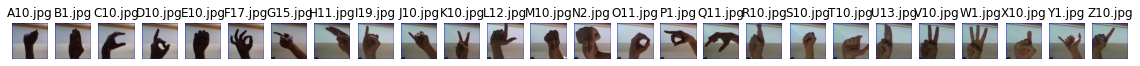

In [180]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# connecting the google colab with my google drive and accessing data files
from google.colab import drive
drive.mount("/drive", force_remount=True)
data_folder = '/drive/My Drive/Colab Notebooks/data'

# Get the class names
classes = os.listdir(data_folder)
print(classes)

# plotting first image in each class
fig = plt.figure(figsize=(20, 35))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

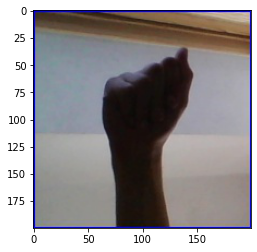

In [181]:
# plotting seperate images to show a bigger picture of what the images look like

# gets the first element in the list of the files in the folder 'A', in this case gets the very first image in folder 'A'
img_file = os.listdir(os.path.join(data_folder,'A'))[0] 
img_a_path = os.path.join(data_folder, 'A', img_file)
img_a = mpimg.imread(img_a_path)
imgplot = plt.imshow(img_a)
a.set_title(img_file)
plt.show()


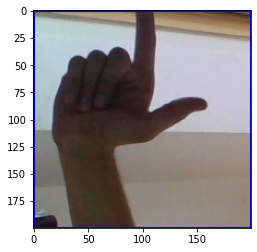

In [183]:
# plotting seperate images to show a bigger picture of what the images look like

# gets the first element in the list of the files in the folder 'L', in this case gets the very first image in folder 'L'
img_file = os.listdir(os.path.join(data_folder,'L'))[0]
img_l_path = os.path.join(data_folder, 'L', img_file)
img_l = mpimg.imread(img_l_path)
imgplot = plt.imshow(img_l)
a.set_title(img_file)
plt.show()

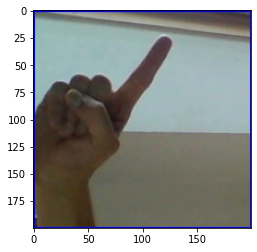

In [184]:
# plotting seperate images to show a bigger picture of what the images look like

# gets the first element in the list of the files in the folder 'Z', in this case gets the very first image in folder 'Z'
img_file = os.listdir(os.path.join(data_folder,'Z'))[0]
img_z_path = os.path.join(data_folder, 'Z', img_file)
img_z = mpimg.imread(img_z_path)
imgplot = plt.imshow(img_z)
a.set_title(img_file)
plt.show()

In [185]:
# looking at shape/size of sample image
img_z.shape

(200, 200, 3)

In [186]:
# calculating the number of training images, had to greatly condense mine
length = 0
train_images_paths = {}

for i in classes:
    train_images_paths[i] = os.listdir(data_folder + '/' + i)
    length += len(os.listdir(data_folder + '/' + i))

print('Length of Training Images:', length)

Length of Training Images: 2080


Figuring out the 2D dimensions and sizes of our images

In [187]:
dim1 = []
dim2 = []

for i, name_list in train_images_paths.items():
    for name in name_list:
        dim1.append(plt.imread(data_folder + '/' + i + '/' + name).shape[0])
        dim2.append(plt.imread(data_folder + '/' + i + '/' + name).shape[1])
    break
    

In [188]:
import numpy as np
img_size = (np.mean(dim1, dtype=np.int32), np.mean(dim2, dtype=np.int32))

img_size

(200, 200)

In [189]:
# test folder path, only small number of pics on test folder, so will be only using this in the end
test_folder = '/drive/My Drive/Colab Notebooks/asl_alphabet_test'
len(os.listdir(test_folder))

26

Splitting our training and testing data using ImageDataGenerator!

In [190]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 30;

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255,
                            validation_split=0.3)

print("Training dataset:")
train_gen = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'rgb',
    subset='training')

print("Validation dataset:")
test_gen = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'rgb',
    subset='validation') 


Getting Data...
Preparing training dataset...
Found 1456 images belonging to 26 classes.
Preparing validation dataset...
Found 624 images belonging to 26 classes.


In [191]:
train_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

# **Creating the CNN Model**

In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
# input layer has the same number of input nodes as the number of features
model.add(Conv2D(32, (3, 3), input_shape=train_gen.image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# drop out layer to help prevent overfitting
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
# drop out layer to help prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
# drop out layer to help prevent overfitting
model.add(Dropout(0.5))
# output layer has the same number of nodes as the number of classes
model.add(Dense(len(classes), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 23, 23, 128)     

In [193]:
num_epochs = 15
history = model.fit(
    train_gen,
    steps_per_epoch = train_gen.samples // batch_size,
    validation_data = test_gen, 
    validation_steps = test_gen.samples // batch_size,
    epochs = num_epochs)

Epoch 1/15
48/48 [==============================] - 6s 124ms/step - loss: 3.1994 - accuracy: 0.0774 - val_loss: 2.3729 - val_accuracy: 0.3733
Epoch 2/15
48/48 [==============================] - 6s 117ms/step - loss: 1.7399 - accuracy: 0.4755 - val_loss: 1.0831 - val_accuracy: 0.7017
Epoch 3/15
48/48 [==============================] - 5s 112ms/step - loss: 0.7546 - accuracy: 0.7473 - val_loss: 0.7465 - val_accuracy: 0.7733
Epoch 4/15
48/48 [==============================] - 5s 112ms/step - loss: 0.3955 - accuracy: 0.8873 - val_loss: 0.7082 - val_accuracy: 0.8350
Epoch 5/15
48/48 [==============================] - 5s 114ms/step - loss: 0.2814 - accuracy: 0.9037 - val_loss: 0.4863 - val_accuracy: 0.8667
Epoch 6/15
48/48 [==============================] - 5s 113ms/step - loss: 0.1721 - accuracy: 0.9442 - val_loss: 0.5571 - val_accuracy: 0.8850
Epoch 7/15
48/48 [==============================] - 5s 114ms/step - loss: 0.1528 - accuracy: 0.9437 - val_loss: 0.7215 - val_accuracy: 0.8767
Epoch 

# **My Attempt At a Transfer Learning Model**

I didn't end up using this for the rest of my code, so you can just hide this section if you'd like

I didn't use it because my accuracy was significantly lower with it 

In [194]:
base_model = keras.applications.resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(200,200,3))
print(base_model.summary())

94773248/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
__________________________

In [195]:
from tensorflow.keras import applications
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

# Freeze the already-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create prediction layer for classification of our images
x = base_model.output
x = Flatten()(x)
prediction_layer = Dense(len(classes), activation='softmax')(x) 
model2 = Model(inputs=base_model.input, outputs=prediction_layer)

# Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Now print the full model, which will include the layers of the base model plus the dense layer we added
print(model2.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [197]:
num_epochs = 7
history = model2.fit(
    train_gen,
    steps_per_epoch = train_gen.samples // batch_size,
    validation_data = test_gen, 
    validation_steps = test_gen.samples // batch_size,
    epochs = num_epochs)

Epoch 1/7
48/48 [==============================] - 12s 172ms/step - loss: 29.6177 - accuracy: 0.0406 - val_loss: 8.3708 - val_accuracy: 0.1217
Epoch 2/7
48/48 [==============================] - 7s 139ms/step - loss: 4.9821 - accuracy: 0.3330 - val_loss: 1.9418 - val_accuracy: 0.4483
Epoch 3/7
48/48 [==============================] - 7s 141ms/step - loss: 1.0146 - accuracy: 0.7357 - val_loss: 1.5646 - val_accuracy: 0.6267
Epoch 4/7
48/48 [==============================] - 7s 141ms/step - loss: 0.6145 - accuracy: 0.8627 - val_loss: 1.3067 - val_accuracy: 0.6833
Epoch 5/7
48/48 [==============================] - 7s 140ms/step - loss: 0.6348 - accuracy: 0.8436 - val_loss: 1.2081 - val_accuracy: 0.6700
Epoch 6/7
48/48 [==============================] - 7s 139ms/step - loss: 0.6927 - accuracy: 0.8403 - val_loss: 1.0798 - val_accuracy: 0.6250
Epoch 7/7
48/48 [==============================] - 7s 139ms/step - loss: 0.4004 - accuracy: 0.9045 - val_loss: 1.8491 - val_accuracy: 0.6150


In [245]:
x_test = test_gen[0][0]
y_test = test_gen[0][1]

test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)

1/1 - 1s - loss: 1.6282 - accuracy: 0.6333


# **Checking accuracy of the model**

In [198]:
# calculating accuracy
x_test = test_gen[0][0]
y_test = test_gen[0][1]

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0192 - accuracy: 1.0000


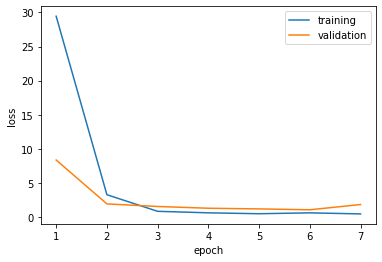

In [199]:
# plotting loss vs. epochs for training and testing 
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...


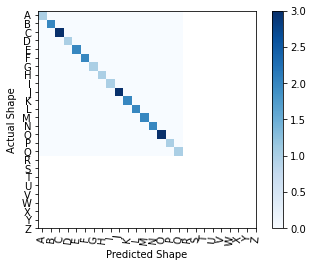

In [200]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
# creating a confusion matrix

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = test_gen[0][0]
y_test = test_gen[0][1]

# Use the model to predict the class
class_prob = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_prob, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

# **Saving and Testing Model**

In [ ]:
!pip install pyyaml h5py

In [201]:
# Save the trained model
!mkdir -p models
model.save('asl_classifier.h5')
del model  # deletes the existing model variable

model saved as /drive/My Drive/Colab Notebooks/models


In [202]:
!ls models
!ls models/asl_classifier.h5

asl_classifier.h5  shape_classifier.h5
models/asl_classifier.h5


In [203]:
new_model = tf.keras.models.load_model('asl_classifier.h5')

# Check its architecture
new_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 23, 23, 128)     

In [204]:
# checking loss and accuracy of saved model
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

1/1 - 0s - loss: 0.0192 - accuracy: 1.0000
Restored model, accuracy: 100.00%


**Testing Images Using Saved Model**

In [242]:
from tensorflow.keras import models
import numpy as np
from random import randint
import os
%matplotlib inline

# Function returns the class name of an input image
# parameters - the saved model and a test images in the form of a numpy array
def classify_image(model, test_images):
    # reshaping the array of 1 image
    imgfeat = test_images.reshape(1, test_images.shape[0], test_images.shape[1], test_images.shape[2])

    #Normalizing pixel values
    imgfeat = imgfeat.astype('float32')
    imgfeat /= 255.0
    
    # Use the model to predict the image class
    class_prob = model.predict(imgfeat)
  
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_prob, axis=1)[0])
    return classes[index]


/drive/My Drive/Colab Notebooks/asl_alphabet_test/E_test.jpg


'E'

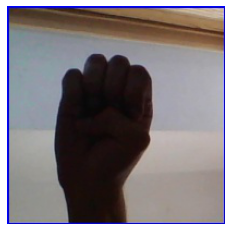

In [243]:
# using an image from the test_folder, specifically the test image for E
test_file = os.listdir(test_folder)[1]
img_path = os.path.join(test_folder, img_file)
# creating the image variable using image path and imread function
img_test = mpimg.imread(img_path)
# plotting image we are testing
plt.axis('off')
plt.imshow(img_test)

print(img_path)
img_np = np.array(img_test)
# classifying the image!
classify_image(new_model, img_np)